# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Mean Reversion Strategy on AUDCAD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
df = pd.read_csv('AUDCAD.csv', index_col=0)
df.index = pd.to_datetime(df.index)

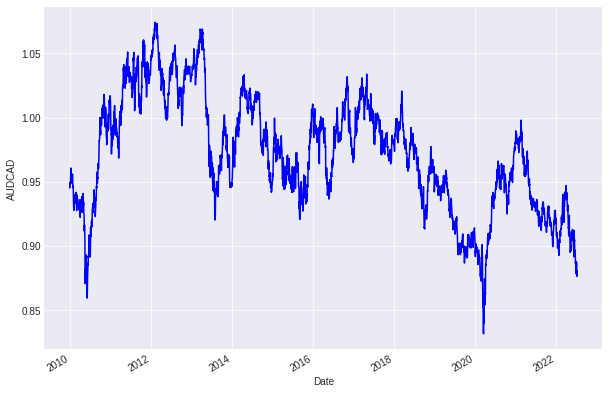

In [3]:
df.Close.plot(figsize=(10,7), color='b')
plt.ylabel("AUDCAD")
plt.show()

## Moving average and moving standard deviation

In [4]:
# Moving Average
df['moving_average'] = df.Close.rolling(5).mean()
# Moving Standard Deviation
df['moving_std_dev'] = df.Close.rolling(5).std()
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev
Date,,,,,,,
2009-12-31,0.94290,0.94600,0.9380,0.94551,0,NaN,NaN
2010-01-01,0.94551,0.94572,0.9440,0.94512,0,NaN,NaN
2010-01-04,0.93930,0.95130,0.9362,0.94940,0,NaN,NaN
2010-01-05,0.94980,0.95160,0.9458,0.94730,0,NaN,NaN
2010-01-06,0.94730,0.95100,0.9465,0.94900,0,0.947266,0.001953


## Upper band and lower band

In [5]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band
Date,,,,,,,,,
2009-12-31,0.94290,0.94600,0.9380,0.94551,0,NaN,NaN,NaN,NaN
2010-01-01,0.94551,0.94572,0.9440,0.94512,0,NaN,NaN,NaN,NaN
2010-01-04,0.93930,0.95130,0.9362,0.94940,0,NaN,NaN,NaN,NaN
2010-01-05,0.94980,0.95160,0.9458,0.94730,0,NaN,NaN,NaN,NaN
2010-01-06,0.94730,0.95100,0.9465,0.94900,0,0.947266,0.001953,0.948242,0.94629


## Long entry and exit

In [6]:
df['long_entry'] = df.Close < df.lower_band
df['long_exit'] = df.Close >= df.moving_average
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
Date,,,,,,,,,,,
2009-12-31,0.94290,0.94600,0.9380,0.94551,0,NaN,NaN,NaN,NaN,False,False
2010-01-01,0.94551,0.94572,0.9440,0.94512,0,NaN,NaN,NaN,NaN,False,False
2010-01-04,0.93930,0.95130,0.9362,0.94940,0,NaN,NaN,NaN,NaN,False,False
2010-01-05,0.94980,0.95160,0.9458,0.94730,0,NaN,NaN,NaN,NaN,False,False
2010-01-06,0.94730,0.95100,0.9465,0.94900,0,0.947266,0.001953,0.948242,0.94629,False,True


## Long Positions

In [7]:
df['positions_long'] = np.nan
df.loc[df.long_entry, 'positions_long'] = 1
df.loc[df.long_exit, 'positions_long'] = 0
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,,,,,
2009-12-31,0.94290,0.94600,0.9380,0.94551,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-01,0.94551,0.94572,0.9440,0.94512,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-04,0.93930,0.95130,0.9362,0.94940,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-05,0.94980,0.95160,0.9458,0.94730,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-06,0.94730,0.95100,0.9465,0.94900,0,0.947266,0.001953,0.948242,0.94629,False,True,0.0


## Forward fill Long Positions

In [8]:
df.positions_long = df.positions_long.fillna(method='ffill')
df.head(5)

,Open,High,Low,Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,,,,,
2009-12-31,0.94290,0.94600,0.9380,0.94551,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-01,0.94551,0.94572,0.9440,0.94512,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-04,0.93930,0.95130,0.9362,0.94940,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-05,0.94980,0.95160,0.9458,0.94730,0,NaN,NaN,NaN,NaN,False,False,NaN
2010-01-06,0.94730,0.95100,0.9465,0.94900,0,0.947266,0.001953,0.948242,0.94629,False,True,0.0


## Short positions

In [9]:
df['short_entry'] = df.Close > df.upper_band
df['short_exit'] = df.Close <= df.moving_average

df['positions_short'] = np.nan
df.loc[df.short_entry, 'positions_short'] = -1
df.loc[df.short_exit, 'positions_short'] = 0

df.positions_short = df.positions_short.fillna(method='ffill')

## Positions

In [10]:
df['positions'] = df.positions_long + df.positions_short

## Cumulative returns

In [11]:
df['percentage_change'] = df.Close.pct_change()
df['strategy_returns'] = df.positions.shift(1) * df.percentage_change
df['cumulative_returns'] = (df.strategy_returns+1).cumprod()

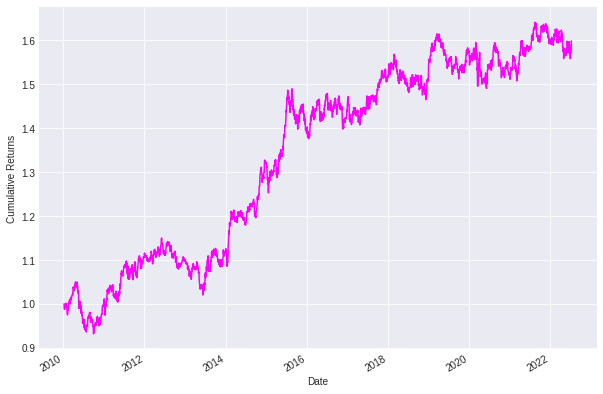

In [12]:
df.cumulative_returns.plot(label='Cumulative Returns', figsize=(10, 7), color='magenta')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

The maximum drawdown is -11.29


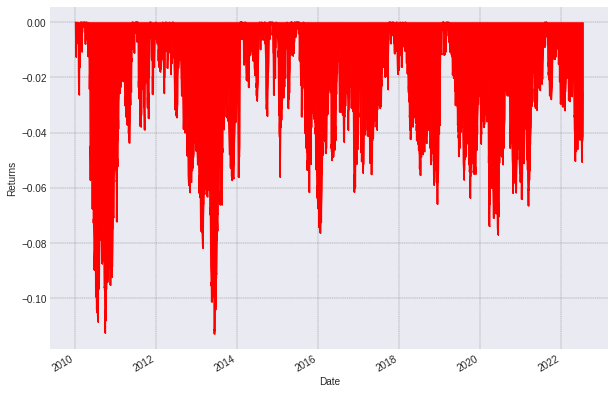

In [14]:
def calc_drawdown(cum_rets):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown):
    fig = plt.figure(figsize=(10, 7))
    # Plot
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


drawdown = calc_drawdown(df.cumulative_returns)
print("The maximum drawdown is %.2f" % (drawdown.min()*100))
plot_drawdown(drawdown)

Next step: Try this strategy on EURCHF. 